In [1]:
%cd ..
from parsing.arff_parsing import parse_arff
import librosa

c:\Users\justi\coding\Uni\MA


In [ ]:
table = list(arff.load(fname='../audio/tiny_aam/annotations/0001_onsets.arff'))
count = 0
for row in table:
    found = False
    for value in row._values[1:]:
        
    
        if "+" in value:
            found = True
    if found:
        count += 1
print(count)

In [43]:
aarf_attribute_to_instrument_name = {
    'Onset_events_of_AcousticGuitar': 'AcousticGuitar',
    'Onset_events_of_AltoSax': 'Saxophone',
    'Onset_events_of_Balalaika': 'Balalaika',
    'Onset_events_of_BrightPiano': 'Piano',
    'Onset_events_of_Cello': 'Cello',
    'Onset_events_of_Clarinet': 'Clarinet',
    'Onset_events_of_DoubleBassArco': 'Bass',
    'Onset_events_of_DoubleBassPizz': 'Bass',
    'Onset_events_of_Drums': 'Drums',
    'Onset_events_of_ElectricBass': 'ElectricBass',
    'Onset_events_of_ElectricGuitarClean': 'ElectricGuitar',
    'Onset_events_of_ElectricGuitarCrunch': 'ElectricGuitar',
    'Onset_events_of_ElectricGuitarLead': 'ElectricGuitar',
    'Onset_events_of_ElectricPiano': 'ElectricPiano',
    'Onset_events_of_Erhu': 'Erhu',
    'Onset_events_of_Flugelhorn': 'Horn',
    'Onset_events_of_Flute': 'Flute',
    'Onset_events_of_Fujara': 'Fujara',
    'Onset_events_of_Jinghu': 'JinghuOperaviolin',
    'Onset_events_of_MorinKhuur': 'MorinKhuurViolin',
    'Onset_events_of_OrganBass': 'Organ',
    'Onset_events_of_PanFlute': 'Panflute',
    'Onset_events_of_Piano': 'Piano',
    'Onset_events_of_Shakuhachi': 'Shakuhachi',
    'Onset_events_of_Sitar': 'Sitar',
    'Onset_events_of_TenorSax': 'Saxophone',
    'Onset_events_of_Trombone': 'Trombone',
    'Onset_events_of_Trumpet': 'Trumpet',
    'Onset_events_of_Ukulele': 'Ukulele',
    'Onset_events_of_Viola': 'Viola',
    'Onset_events_of_Violin': 'Violin'
    }
def parse_arff_line(line:str):
    if "@ATTRIBUTE" in line:
        attribute = line.split("'")[1]
        return True, attribute
    elif len(line) > 0 and line[0].isdigit():
        onset, tail = line.split(",", maxsplit=1)
        values = tail.split("]','[")
        values = [value.replace("'","") for value in values]
        values = [value.replace("[","") for value in values]
        values = [value.replace("]","") for value in values]
        values[-1] = values[-1].replace("\n", "")
        return False, onset, values
    else:
        return None

def parse_arff(filename):
    records = {}
    attributes = []
    lines = {}
    with open(filename, 'r') as fp:
        for line in fp.readlines():
            result = parse_arff_line(line)
            if result is not None:
                if result[0]:
                    # Attribute
                    attributes.append(result[1])
                else:
                    lines[result[1]] = result[2]

    for onset in lines:
        row = lines[onset]
        records[onset] = []
        for i, attribute in enumerate(attributes):
            if attribute == 'Onset_time_in_seconds' or type(attribute) is not str:
                continue
            if row[i-1]:
                if onset == 119.02157:
                    print("AHA!")
                data = row[i-1]
                instrument = aarf_attribute_to_instrument_name[attribute]

                for pitch in data.split(","):
                    records[onset].append((instrument, pitch))
    return records

In [3]:
records = parse_arff('./audio/tiny_aam/annotations/0001_onsets.arff')
records

{'0.0': [('Organ', '+41'), ('Saxophone', '+60'), ('Ukulele', '+65')],
 '0.326086': [('Organ', '41'), ('Ukulele', '+60')],
 '0.652173': [('Organ', '41'), ('Saxophone', '+65'), ('Ukulele', '+65')],
 '0.978259': [('Organ', '41'), ('Saxophone', '65'), ('Ukulele', '+69')],
 '1.304346': [('Organ', '41'), ('Saxophone', '+65'), ('Ukulele', '+65')],
 '1.630432': [('Organ', '41'), ('Saxophone', '65'), ('Ukulele', '+69')],
 '1.956519': [('Organ', '41'), ('Saxophone', '+64'), ('Ukulele', '+60')],
 '2.282605': [('Organ', '41'), ('Saxophone', '64'), ('Ukulele', '+65')],
 '2.608692': [('Organ', '+46'), ('Saxophone', '+67'), ('Ukulele', '+70')],
 '2.934778': [('Organ', '46'), ('Saxophone', '67'), ('Ukulele', '+65')],
 '3.260865': [('Organ', '46'), ('Saxophone', '+67'), ('Ukulele', '+70')],
 '3.586951': [('Organ', '46'), ('Saxophone', '+69'), ('Ukulele', '+62')],
 '3.913038': [('Organ', '46'), ('Saxophone', '+60'), ('Ukulele', '+70')],
 '4.239124': [('Organ', '46'), ('Ukulele', '+62')],
 '4.565211': [(

In [19]:
len(table)

369

In [60]:
y, sr = librosa.load('../audio/tiny_aam/audio-mixes-mp3/0001_mix.mp3', sr=11025)
onset_samples = librosa.onset.onset_detect(y=y, units="samples")
onset_times = librosa.samples_to_time(onset_samples, sr=sr)
len(onset_times)

368

In [61]:
onset_frames = librosa.onset.onset_detect(y=y, units="frames")
oenv = librosa.onset.onset_strength(y=y, sr=sr)
backtracked_onset_frames = librosa.onset.onset_backtrack(onset_frames, oenv)
backtracked_onset_times = librosa.frames_to_time(backtracked_onset_frames)
len(backtracked_onset_times)

368

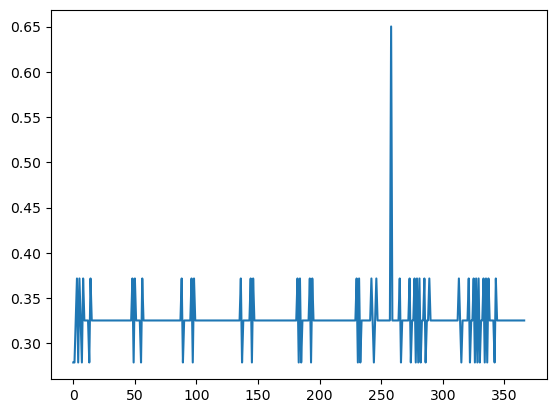

In [62]:
import matplotlib.pyplot as plt
true_onsets = [row._values[0] for row in table]
distances = [onset_times[i] - true_onsets[i] for i in range(len(onset_times))]
backtrack_distances = [backtracked_onset_times[i] - true_onsets[i] in range(len(backtracked_onset_times))]
onset_gaps = [onset_times[i+1] - onset_times[i] for i in range(len(onset_times) - 1)]
# plt.plot(onset_times[:10], "bo")
# plt.plot(backtracked_onset_times[:10], "ro")
# plt.plot(true_onsets[:10], "go")
# plt.plot(distances, "ro")
plt.plot(onset_gaps)

In [64]:
small_distances = [dist for dist in onset_gaps if dist < 0.1]
len(small_distances)

0

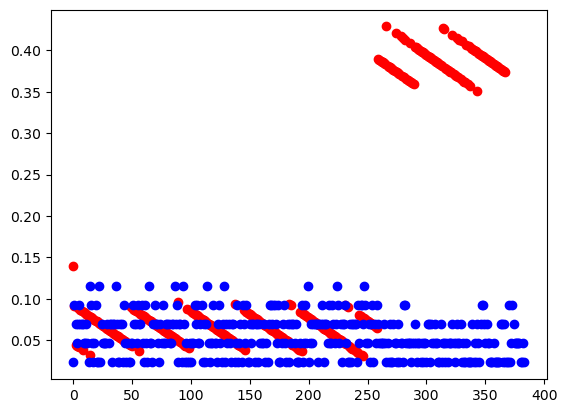

In [66]:
plt.plot(distances, "ro")
plt.plot(backtrack_distances, "bo")

In [67]:
import numpy as np
onset_dist_mean = np.mean(distances)
backtrack_dist_mean = np.mean(backtrack_distances)
print(onset_dist_mean)
print(backtrack_dist_mean)

0.15945306424381347
0.05417989417989438
